# Census Income Data Set 

Abstract: Predict whether income exceeds $50K/yr based on census data. Also known as "Adult" dataset.

In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm_notebook
from matplotlib import pyplot as plt
from scipy import stats
%matplotlib inline

# Load the Data

In [2]:
col_names=['age',
            'workclass',
            'fnlwgt',
            'education',
            'education-num',
            'marital-status',
            'occupation',
            'relationship',
            'race',
            'sex',
            'capital-gain',
            'capital-loss',
            'hours-per-week',
            'native-country',
            'inc_class']


In [3]:
ds=pd.read_csv('adult.data', ',', names=col_names, index_col=False)
ds.head()

C:\Users\isa_a\AppData\Local\Temp\ipykernel_1632\41874643.py:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  ds=pd.read_csv('adult.data', ',', names=col_names, index_col=False)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,inc_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
ds.shape

(32561, 15)

In [5]:
len(ds['native-country'].unique())

42

In [6]:
import math
math.log2(42)

5.392317422778761

# Categorical features

In [7]:
import category_encoders as ce

In [8]:
ds.dtypes[ds.dtypes=='object'].index


Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'inc_class'],
      dtype='object')

In [9]:
ce_bin = ce.BinaryEncoder(cols = list(ds.dtypes[ds.dtypes=='object'].index))
ce_bin.fit_transform(ds)

,age,workclass_0,workclass_1,workclass_2,workclass_3,fnlwgt,education_0,education_1,education_2,education_3,...,capital-loss,hours-per-week,native-country_0,native-country_1,native-country_2,native-country_3,native-country_4,native-country_5,inc_class_0,inc_class_1
0,39,0,0,0,1,77516,0,0,0,0,...,0,40,0,0,0,0,0,1,0,1
1,50,0,0,1,0,83311,0,0,0,0,...,0,13,0,0,0,0,0,1,0,1
2,38,0,0,1,1,215646,0,0,0,1,...,0,40,0,0,0,0,0,1,0,1
3,53,0,0,1,1,234721,0,0,0,1,...,0,40,0,0,0,0,0,1,0,1
4,28,0,0,1,1,338409,0,0,0,0,...,0,40,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,0,0,1,1,257302,0,0,1,1,...,0,38,0,0,0,0,0,1,0,1
32557,40,0,0,1,1,154374,0,0,0,1,...,0,40,0,0,0,0,0,1,1,0
32558,58,0,0,1,1,151910,0,0,0,1,...,0,40,0,0,0,0,0,1,0,1
32559,22,0,0,1,1,201490,0,0,0,1,...,0,20,0,0,0,0,0,1,0,1


# Algorithms

In [10]:
from sklearn.model_selection import train_test_split

#set x and y
#classification
ds_clf=ds.drop(['inc_class'], axis=1)
#binary encoding
ce_bin = ce.BinaryEncoder(cols = list(ds_clf.dtypes[ds_clf.dtypes=='object'].index))
ds_clf_bin_enc=ce_bin.fit_transform(ds_clf)
y_clf=[0 if ic==' <=50K' else 1 for ic in ds.inc_class]
#Train/test split
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(ds_clf_bin_enc, y_clf, test_size=0.33, random_state=42)


#regression
ds_reg = ds.drop(['age'], axis=1)
ce_bin = ce.BinaryEncoder(cols = list(ds_reg.dtypes[ds_reg.dtypes=='object'].index))
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(ce_bin.fit_transform(ds_reg), ds.age, test_size=0.33, random_state=42)


In [11]:
X_train_c.shape

(21815, 36)

## Dimensionality reduction

In [14]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

### PCA

In [15]:
pca = PCA()
x_pca_clf=pca.fit(ds_clf_bin_enc)

In [16]:
np.cumsum(x_pca_clf.explained_variance_ratio_)

array([0.99511364, 0.99998548, 0.99999997, 0.99999999, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        ])

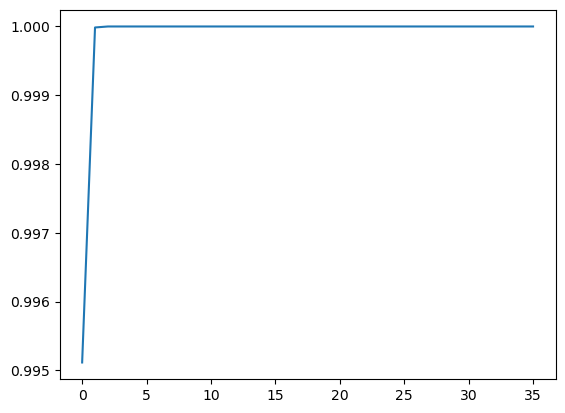

In [17]:
from matplotlib import pyplot as plt
plt.plot(np.cumsum(x_pca_clf.explained_variance_ratio_))

In [18]:
pca = PCA(n_components=2)
x_pca_clf=pca.fit_transform(ds_clf_bin_enc)
X_train_c2D, X_test_c2D, y_train_c2D, y_test_c2D = train_test_split(x_pca_clf, y_clf, test_size=0.33, random_state=42)


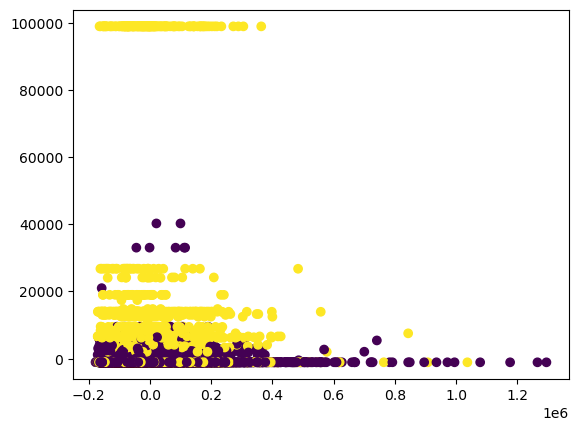

In [19]:
plt.scatter(x_pca_clf[:,0], x_pca_clf[:,1], c=y_clf)
#plt.legend()

### TSNE

In [20]:
tsne=TSNE(n_components=2)
x_tsne_clf=tsne.fit_transform(ds_clf_bin_enc)
X_train_c2D2, X_test_c2D2, y_train_c2D2, y_test_c2D2 = train_test_split(x_tsne_clf, y_clf, test_size=0.33, random_state=42)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


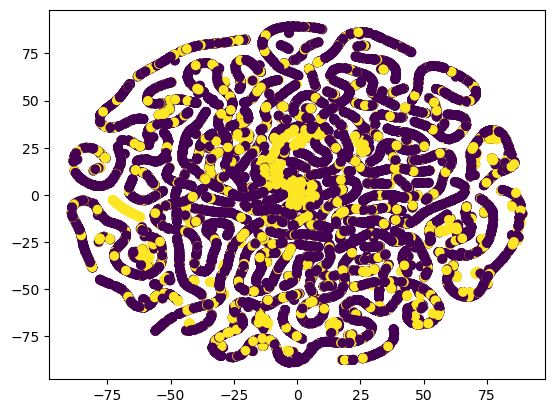

In [21]:
plt.scatter(x_tsne_clf[:,0], x_tsne_clf[:,1], c=y_clf)

## Decision tree

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

### Classification

In [27]:
clf=DecisionTreeClassifier(max_depth=5)
clf.fit(X_train_c, y_train_c)

print('Training accuracy:', clf.score(X_train_c, y_train_c))
print('Test accuracy:',clf.score(X_test_c, y_test_c))

Training accuracy: 0.8522117808847124
Test accuracy: 0.8521310254978597


In [30]:
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
               feature_names=X_train_c.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  



In [34]:
import sklearn
sklearn.__version__

'1.0.2'

In [37]:
Image(graph.create_png())

InvocationException: GraphViz's executables not found

You see a decision tree. That is a binary tree where each node represents a portion of the data. Each node that is not a leaf splits its part of the data in two sub-parts. The root node contains all data (from the training set). Futrhermore, this is a classification tree. It predicts class probabilities - the node values.

**Root node:**

- samples = 134 that means the node 'contains' 134 samples. Since it's the root node that means the tree was trained on 134 samples.
- value = [0.373, 0.627] are class probabilities. About 1/3 of the samples belong to class A and 2/3 to class B.
- gini = 0.468 is the gini impurity of the node. It discribes how much the classes are mixed up.
- F5 <= 0.5 What are the column names of the data? Right. This means that the node is split so that all samples where the feature F5 is lower than 0.5 go to the left child and the samples where the feature is higher than 0.5 go to the right child.

**Leaf nodes:**

These nodes are not further split, so there is no need for a F <= something field.
- samples = 90/44 sum to 134. 90 samples went to the left child and 44 samples to the right child.
- values = [0.104, 0.567]/[0.269, 0.06] are the class probabilities in the children. Most samples in the left child belong to class B (0.56 vs 0.10) and most samples in the right child belong to class A (0.27 v 0.06).
- gini = 0.263/0.298 are the remaining impurities in the child nodes. They are lower than in the parent node, which means the split improved separability between the classes, but there is still some uncertainty left.

https://stackoverflow.com/questions/47503575/what-do-the-values-that-graphviz-renders-inside-each-node-of-a-decision-tree-m

In [20]:
with open("DT_vis.png", "wb") as png:
        png.write(graph.create_png())

### Regression

In [38]:
reg=DecisionTreeRegressor(max_depth=5)
reg.fit(X_train_r, y_train_r)

print('Training R2:', reg.score(X_train_r, y_train_r))
print('Test R2:',reg.score(X_test_r, y_test_r))

Training R2: 0.41772052919780134
Test R2: 0.4140397516997396


In [40]:
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(reg, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
               feature_names=X_train_r.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

In [41]:
Image(graph.create_png())

InvocationException: GraphViz's executables not found

In [24]:
with open("DT_vis2.png", "wb") as png:
        png.write(graph.create_png())

## SVM

In [42]:
from sklearn import svm
from sklearn import linear_model

### Classification

In [46]:
#

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
# svc = svm.SVC(kernel='linear', C=C).fit(X_train_c2D, y_train_c2D)
# rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X_train_c2D, y_train_c2D)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X_train_c2D, y_train_c2D)

In [47]:
lin_svc = svm.LinearSVC(C=C, verbose=True, max_iter=100000).fit(X_train_c2D, y_train_c2D)
#print(4)
#sgd = linear_model.SGDClassifier(verbose=10, n_jobs=6, max_iter=1000).fit(X_train_c2D2, y_train_c2D2)

[LibLinear]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [49]:
print('Poly SVC train/test accuracy score:',  poly_svc.score(X_train_c2D, y_train_c2D), '/', poly_svc.score(X_test_c2D, y_test_c2D))
print('Linear SVC train/test accuracy score:',  lin_svc.score(X_train_c2D, y_train_c2D), '/', lin_svc.score(X_test_c2D, y_test_c2D))

Poly SVC train/test accuracy score: 0.7679119871647949 / 0.7716359575656058
Linear SVC train/test accuracy score: 0.7910611964244786 / 0.7962032384142937


In [ ]:
# create a mesh to plot in
h = .02  # step size in the mesh
x_min, x_max = X_train_c2D2[:, 0].min() - 1, X_train_c2D2[:, 0].max() + 1
y_min, y_max = X_train_c2D2[:, 1].min() - 1, X_train_c2D2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = poly_svc.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Plot also the training points
plt.scatter(X_train_c2D2[:, 0], X_train_c2D2[:, 1], c=y_train_c2D2)#, cmap=plt.cm.coolwarm

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
#plt.title(titles[i])

plt.show()

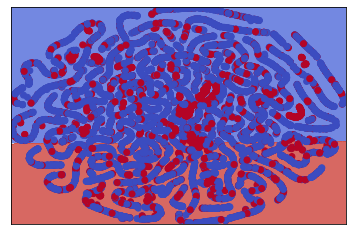

In [29]:
# create a mesh to plot in
x_min, x_max = X_test_c2D2[:, 0].min() - 1, X_test_c2D2[:, 0].max() + 1
y_min, y_max = X_test_c2D2[:, 1].min() - 1, X_test_c2D2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = sgd.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Plot also the training points
plt.scatter(X_test_c2D2[:, 0], X_test_c2D2[:, 1], c=y_test_c2D2, cmap=plt.cm.coolwarm)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
#plt.title(titles[i])

plt.show()

## K-nearest neighbors

In [22]:
from sklearn.neighbors import KNeighborsClassifier

In [23]:
neigh = KNeighborsClassifier(n_neighbors=7, n_jobs=6)
neigh.fit(X_train_c2D2, y_train_c2D2)

KNeighborsClassifier(n_jobs=6, n_neighbors=7)

In [24]:
print('5-nearest neighbors model train/test accuracy score:', neigh.score(X_train_c2D2, y_train_c2D2),'/', neigh.score(X_test_c2D2, y_test_c2D2))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


5-nearest neighbors model train/test accuracy score: 0.8150813660325464 / 0.7826167876419132


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


## Bayesian

In [25]:
from sklearn.naive_bayes import GaussianNB

In [26]:
gnb = GaussianNB(priors=[0.7574604629841852,1-0.7574604629841852]).fit(X_train_c2D2, y_train_c2D2)

In [27]:
print('Naive Bayes model train/test accuracy score:', gnb.score(X_train_c2D2, y_train_c2D2),'/', gnb.score(X_test_c2D2, y_test_c2D2))

Naive Bayes model train/test accuracy score: 0.7574604629841852 / 0.7627024008933556


In [28]:
y_train_c.count(0)/len(y_train_c)

0.7574604629841852

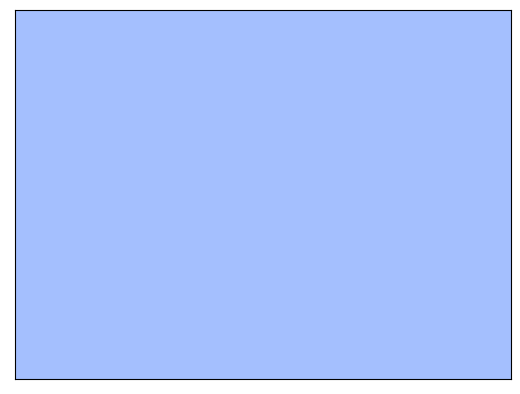

In [29]:
# create a mesh to plot in
h = .02  # step size in the mesh
x_min, x_max = X_train_c2D2[:, 0].min() - 1, X_train_c2D2[:, 0].max() + 1
y_min, y_max = X_train_c2D2[:, 1].min() - 1, X_train_c2D2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = gnb.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Plot also the training points
#plt.scatter(X_train_c2D2[:, 0], X_train_c2D2[:, 1], c=y_train_c2D2)#, cmap=plt.cm.coolwarm

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
#plt.title(titles[i])

plt.show()

In [30]:
y_pred=gnb.predict(X_test_c2D2)

In [ ]:
plt.scatter()

In [31]:
gnb = GaussianNB().fit(X_train_c, y_train_c)

In [32]:
print('Naive Bayes model train/test accuracy score:', gnb.score(X_train_c, y_train_c),'/', gnb.score(X_test_c, y_test_c))

Naive Bayes model train/test accuracy score: 0.7924363969745588 / 0.7994602642843849


In [33]:
from sklearn.naive_bayes import BernoulliNB

In [34]:
bnb = BernoulliNB().fit(X_train_c2D, y_train_c2D)
print('Naive Bayes model train/test accuracy score:', bnb.score(X_train_c2D, y_train_c2D),'/',bnb.score(X_test_c2D, y_test_c2D))

Naive Bayes model train/test accuracy score: 0.7796928718771488 / 0.7847571189279732
